# Introduction

Here I'm looking at the cover times of the random walker versus the urban explorer on the ring graph

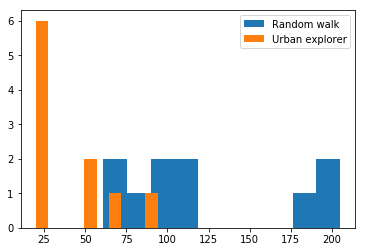

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import funcs as f
import osmnx as ox
import networkx as nx
from multiprocessing import Pool
from datetime import datetime
import time as time
from scipy import optimize
import pickle
%matplotlib inline

num_nodes = 20
G = nx.cycle_graph(num_nodes)

num_trials, m = 10, 1  # m = number of times each node has to be covered
Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
plt.hist(Ts_rw);plt.hist(Ts_ue);plt.legend(['Random walk','Urban explorer'])

#np.savetxt('data/covertimes_ring_urban_explorer.txt',Ts_ue)
#np.savetxt('data/covertimes_ring_random_walker.txt',Ts_rw)

Good. Makes sense; the advective part of the urban explorer is useful on the ring. I wonder could I find
that curve analytically. Is it an exponential?

## Be systematic

finished N = 5
finished N = 10
finished N = 15
finished N = 20
finished N = 25
finished N = 30
finished N = 35
finished N = 40
finished N = 45
finished N = 50
finished N = 55
finished N = 60
finished N = 65
finished N = 70
finished N = 75
finished N = 80
finished N = 85
finished N = 90
finished N = 95
finished N = 100


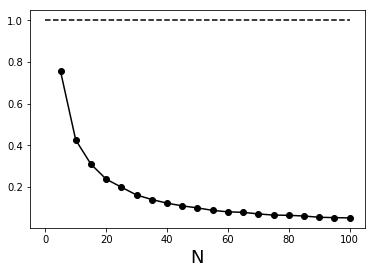

In [107]:
meanTratios = []
varTratios = []
Ns = range(5,101,5)
m = 1
for N in Ns:
    num_trials = 2000
    G = nx.cycle_graph(N)
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTratios.append(np.mean(Ts_ue)/np.mean(Ts_rw))
    #varTratios.append(np.std(Ts_ue) / np.std(Ts_rw) ) 
    print 'finished N = ' + str(N)
plt.plot(Ns,meanTratios,'ko-')
#plt.plot(Ns,varTratios,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(Ns),linestyles='dashed')

np.savetxt('data/mean_covertime_ratio_ring.txt',meanTratios)
np.savetxt('data/mean_covertime_ratio_ring_Ns.txt',Ns)

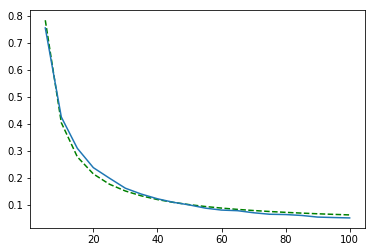

In [117]:
from scipy.optimize import curve_fit

def func(x,a,b):
    return a + b/x

popt, pcov = curve_fit(func, Ns, meanTratios)

plt.plot(Ns, func(Ns, *popt), 'g--')
plt.plot(Ns,meanTratios)

### Look at scaling for just u.e. (not ratio)

In [92]:
Ts = []
Ns = range(1,1000,50)
m = 1
for N in Ns:
    num_trials = 500
    G = nx.cycle_graph(N)
    T = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    Ts.append(np.mean(T))
    print 'finished N = ' + str(N)
plt.plot(Ns,Ts,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')

finished N = 1
finished N = 51
finished N = 101
finished N = 151
finished N = 201
finished N = 251
finished N = 301
finished N = 351
finished N = 401
finished N = 451
finished N = 501
finished N = 551
finished N = 601
finished N = 651


KeyboardInterrupt: 

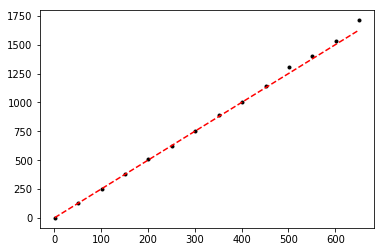

In [94]:
Ns = range(1,700,50)
plt.plot(Ns,Ts,'k.')
plt.plot(Ns,2.5*np.array(Ns),'r--')

Looks like it could be $T \sim \frac{5}{2} N$

### Redo

finished N = 10
finished N = 50
finished N = 100
finished N = 150
finished N = 200
finished N = 250
finished N = 300
finished N = 350
finished N = 400
finished N = 450
finished N = 500
finished N = 550
finished N = 600
finished N = 650
finished N = 700
finished N = 750
finished N = 800
finished N = 850
finished N = 900
finished N = 950
finished N = 1000


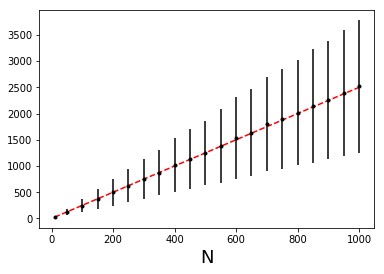

In [72]:
T_mean = []
T_std = []
Ns = [10] + range(50,1001,50)
m = 1
for N in Ns:
    num_trials = 5000
    G = nx.cycle_graph(N)
    T = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    T_mean.append(np.mean(T))
    T_std.append(np.std(T))
    print 'finished N = ' + str(N)
plt.errorbar(Ns,T_mean,yerr=T_std, fmt='k.')
plt.xlabel('N',fontsize=18)
plt.plot(Ns,2.5*np.array(Ns),'r--')
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} 

I'm running for 5000 trials, to be as exact as possible.

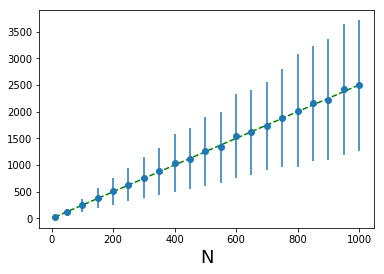

In [35]:
plt.errorbar(Ns,T_mean,yerr=T_std, fmt='o')
plt.xlabel('N',fontsize=18)
plt.plot(Ns,2.5*np.array(Ns),'g--')

<ErrorbarContainer object of 3 artists>

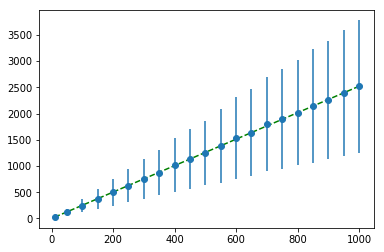

In [73]:
from scipy.optimize import curve_fit
def func(N,b,c):
    return b*N**c
popt, pcov = curve_fit(func,Ns,T_mean)
plt.plot(Ns, func(Ns, *popt), 'g--')
plt.errorbar(Ns,T_mean,yerr=T_std,fmt='o')

<ErrorbarContainer object of 3 artists>

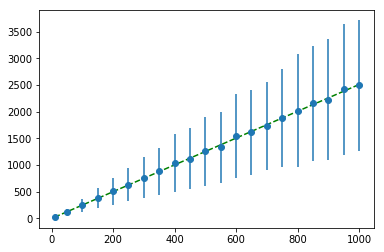

In [70]:
from scipy.optimize import curve_fit
def func(N,b):
    return N*b
popt, pcov = curve_fit(func,Ns,T_mean)
plt.plot(Ns, [func(N,popt[0]) for N in Ns], 'g--')
plt.errorbar(Ns,T_mean,yerr=T_std,fmt='o')

In [75]:
np.savetxt('data/mean_cover_td_ring.txt',T_mean)
np.savetxt('data/mean_cover_td_ring_Ns.txt',Ns)
np.savetxt('data/mean_cover_td_ring_std.txt',T_std)

In [5]:
T_mean = np.loadtxt('data/mean_cover_td_ring.txt')
Ns = np.loadtxt('data/mean_cover_td_ring_Ns.txt')

from scipy.optimize import curve_fit
def func(N,a,b):
    return a*N**2 + N*b 
popt, pcov = curve_fit(func,Ns,T_mean)
popt, pcov
#plt.plot(Ns, [func(N,popt[0]) for N in Ns], 'b--')
#plt.plot(Ns,T_mean,'bo')

(array([-2.90009521e-06,  2.52212940e+00]),
 array([[ 4.01358725e-10, -3.08357351e-07],
        [-3.08357351e-07,  2.52652700e-04]]))

### Increase num samples at fixed $N$

finished num trials = 100
finished num trials = 200
finished num trials = 500
finished num trials = 1000
finished num trials = 5000
finished num trials = 10000
finished num trials = 50000
finished num trials = 100000


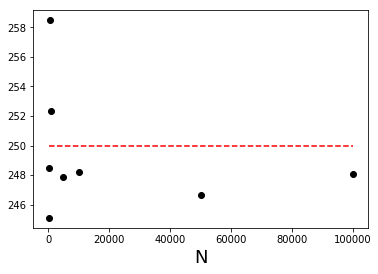

In [100]:
T_mean = []
T_std = []
Ns = [100,200,500,10**3, 5*10**3, 10**4, 5*10**4, 10**5]
N, m = 100, 1
for N1 in Ns:
    num_trials = N1
    G = nx.cycle_graph(N)
    T = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    T_mean.append(np.mean(T))
    print 'finished num trials = ' + str(N1)
plt.plot(Ns,T_mean,'ko')
plt.xlabel('N',fontsize=18)
plt.plot(Ns,[2.5*np.array(N) for n in Ns],'r--')

finished num trials = 100
finished num trials = 1000
finished num trials = 10000
finished num trials = 100000
finished num trials = 1000000
finished num trials = 10000000


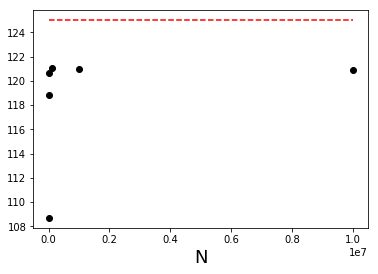

In [103]:
T_mean = []
T_std = []
Ns = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7]
N, m = 50, 1
for N1 in Ns:
    num_trials = N1
    G = nx.cycle_graph(N)
    T = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    T_mean.append(np.mean(T))
    print 'finished num trials = ' + str(N1)
plt.plot(Ns,T_mean,'ko')
plt.xlabel('N',fontsize=18)
plt.plot(Ns,[2.5*np.array(N) for n in Ns],'r--')

In [104]:
T_mean = []
T_std = []
Ns = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7]
N, m = 100, 1
for N1 in Ns:
    num_trials = N1
    G = nx.cycle_graph(N)
    T = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    T_mean.append(np.mean(T))
    print 'finished num trials = ' + str(N1)
plt.plot(Ns,T_mean,'ko')
plt.xlabel('N',fontsize=18)
plt.plot(Ns,[2.5*np.array(N) for n in Ns],'r--')

finished num trials = 100
finished num trials = 1000
finished num trials = 10000
finished num trials = 100000


KeyboardInterrupt: 

### Find $\delta$

I want to compute the difference between the analytic formula and the numerical value

$\delta(N) = \langle T \rangle - \frac{5}{2} N$

If $\langle T \rangle = \frac{5}{2} N$ is true asmptotically, then they shoud decease with N

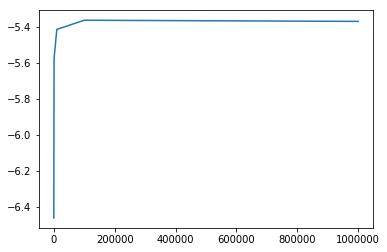

In [6]:
def find_delta(G,num_trials):
    
    meanTs = []
    nodes = [node for node in G.nodes()]
    Ts = []
    trial = 0
    N = G.number_of_nodes()
    
    paths = compute_and_save_all_shortest_paths(G)
    
    while trial < num_trials[-1]:
        trial += 1
        time = 0
        counts = np.zeros(len(nodes)) #count[i] count of node is        
        current_position = np.random.choice(nodes)
        counts[current_position] += 1
        num_unvisited_nodes = np.sum(counts < m)
        while num_unvisited_nodes > 0:
            nodes_minus_origin = nodes[:current_position] + nodes[current_position+1:]
            destination = np.random.choice(nodes_minus_origin)
            
            #Pick one of possibly many shortest paths
            all_shortest_paths = paths[current_position][destination]
            temp = np.random.choice(range(len(all_shortest_paths)))
            path = all_shortest_paths[temp]
            path = path[1:] #remove the origin
            
            #Traverse path
            for node in path:
                counts[node] += 1
                num_unvisited_nodes = np.sum(counts < m)
                time += 1
            current_position = destination
        Ts.append(time)
        if trial in num_trials:
            meanTs.append(np.mean(Ts))
    return [i - (5.0*(N)/2.0) for i in meanTs]


from funcs import *
N = 10
#num_trials = [10**2,10**3,10**4,10**5,10**6]
num_trials = [10**2, 10**3, 10**4, 10**5, 10**6]
G = nx.cycle_graph(N)
delta = find_delta(G,num_trials)
plt.plot(num_trials, delta)

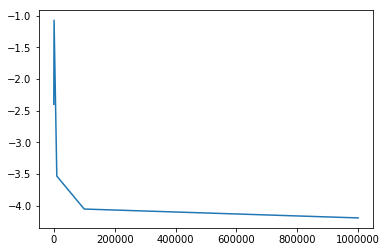

In [7]:
from funcs import *
N = 50
#num_trials = [10**2,10**3,10**4,10**5,10**6]
num_trials = [10**2, 10**3, 10**4, 10**5, 10**6]
G = nx.cycle_graph(N)
delta = find_delta(G,num_trials)
plt.plot(num_trials, delta)

Ahh -- so they coefficients are NOT exact. Maybe they're asymptotically exact?

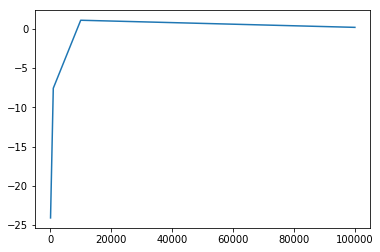

In [8]:
from funcs import *
N = 200
#num_trials = [10**2,10**3,10**4,10**5,10**6]
num_trials = [10**2, 10**3, 10**4, 10**5]
G = nx.cycle_graph(N)
delta = find_delta(G,num_trials)
plt.plot(num_trials, delta)
plt.plot([i for in in num_trials])

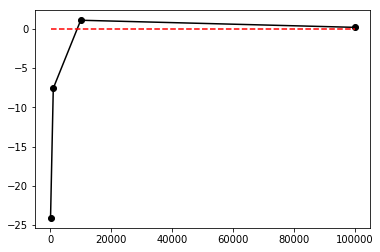

In [14]:
plt.plot(num_trials, delta,'ko-')
plt.plot(num_trials, [0 for i in num_trials], 'r--')

Oh good! So it looks like it could be true asymptotically. 

### By systematic

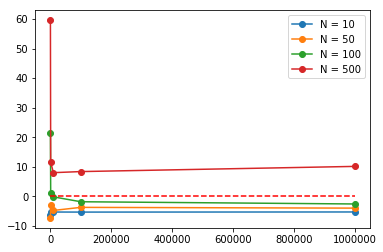

In [27]:
Ns = [10,50,100,500]
num_trials = [10**2, 10**3, 10**4, 10**5, 10**6]
#num_trials = [10**2, 10**3]
for N in Ns:
    G = nx.cycle_graph(N)
    delta = find_delta(G,num_trials)
    plt.plot(num_trials, delta,'o-')
    np.savetxt('data/converge_delta_ring_graph_N_' + str(N) + '.txt',delta)
    np.savetxt('data/converge_num_trials_ring_graph_N_' + str(N) + '.txt',num_trials)
plt.plot(num_trials, [0 for i in num_trials], 'r--')
plt.legend(['N = ' + str(n) for n in Ns])

OK, so the leaded coefficient is not exactly 5/2. Oh well, then just recurse t

In [28]:
delta

[59.63000000000011,
 11.469000000000051,
 7.9698000000000775,
 8.335900000000038,
 10.090574999999944]

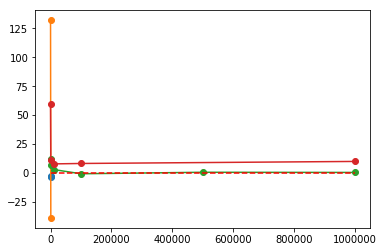

In [30]:
Ns = [10,50,200,500]
for N in Ns:
    delta = np.loadtxt('data/converge_delta_ring_graph_N_' + str(N) + '.txt')
    Ns1 = np.loadtxt('data/converge_num_trials_ring_graph_N_' + str(N) + '.txt')
    plt.plot(Ns1,delta,'o-')
plt.plot(Ns1, [0 for i in Ns1], 'r--')

### Versus $m$

finished N = 50
finished N = 50
finished N = 50
finished N = 50
finished N = 50
finished N = 50
finished N = 50
finished N = 50
finished N = 50
finished N = 50


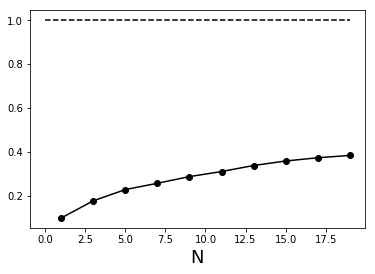

In [35]:
meanTratios = []
varTratios = []
N = 50
ms = range(1,21,2)
for m in ms:
    num_trials = 1000
    G = nx.cycle_graph(N)
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTratios.append(np.mean(Ts_ue)/np.mean(Ts_rw))
    #varTratios.append(np.std(Ts_ue) / np.std(Ts_rw) ) 
    print 'finished N = ' + str(N)
plt.plot(ms,meanTratios,'ko-')
#plt.plot(Ns,varTratios,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(ms),linestyles='dashed')


np.savetxt('data/meanTratio_versus_mbar_RG.txt',meanTratios)
np.savetxt('data/maxTration_ns_RG.txt',ms)

### Check  $<T>$ over higher ranges of $N$

finished N = 100
took 0.0617834329605 mins 

finished N = 200
took 0.462340601285 mins 

finished N = 400
took 3.91633126736 mins 

finished N = 800
took 37.6236404856 mins 



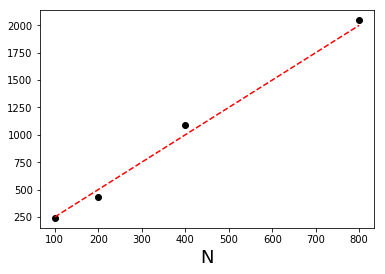

In [8]:
import time
T_mean = []
T_std = []
Ns = [10**2, 2*10**2, 4*10**2, 8*10**2]
m = 1
for N in Ns:
    num_trials = 10
    G = nx.cycle_graph(N)
    t1 = time.time()
    T = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    T_mean.append(np.mean(T))
    T_std.append(np.std(T))
    print 'finished N = ' + str(N)
    t2 = time.time()
    print 'took ' + str((t2-t1)/60.0) + ' mins \n'

plt.plot(Ns,T_mean,'ko')
plt.xlabel('N',fontsize=18)
plt.plot(Ns,2.5*np.array(Ns),'r--')

%More efficient under some contexts
Our work shows the taxi-drive covers some graphs more efficiently than other models used for random searches, namely the persistent and regular random walk. Another benefit of the taxi-drive is that it is defined on arbitrary graphs; it isn't confined to the sub class of Euclidean graphs like the persistent random walk, levy flight, and levy walk. It could this be potentially useful in x,y and other contexts in which random searches on graphs are useful.

Another potential application of the taxi-drive is in community detection. Here, efficient algorithms have been designed by exploiting the relationship between the spreading properties of random walkers and graph topology; since the density $p_i(t)$ of a random walker at a given node is related to its degree $d_i$, nodes with similar degree -- that is, nodes which form somme commmunity -- can be detected by tracking $p_i(t)$. By swapping the random walk with the taxi-drive, for which $p_i(t)$ is related to $b_i$ as Figure~\ref{}, perhaps other flavours of community could by cheaply identified. 

Our numerical study of the curious tourist problem raises many questions. First, the conjectured scalings of the mean cover time of the taxi-drive on the ring and linear graphs $\langle T \range_{TD}^{ring} = O(N)$ and $\langle T \range_{TD}^{linear} = O(N^2)$ cry out for theoretical explanation. (This would also solve the puzzle of why the ring and linear give different scalings). Moreover, given the ring and linear graph's simple topologies, an exact solution for $\\ langle T \rangle_{TD}$ might be possible. Perhaps the techniques used in \cite{chupeau2014mean} to calculate $\langle T \rangle_{PRW}$ on these graphs could be used. Another  interesting open problem is to determine which graph topology maximizes the cover time of the taxi-drive. The 'stickiness' of the bells in the barbell graph trap the random walker -- what graph motifs are needed to hamper the taxi-drive? Finally, the puzzling behavior of the $m$-cover time could also be studied; does the regularity / randomness of the graph topology determine the scaling with $m$, as our numerics suggest? We hope future work will solve these puzzles, as well and investigate other properties of the taxi drive, such as its mean first passage times and mixing times.